# Linear Regression - Classical appoach

The objective of this notebook is to introduce the *classical approach to linear regression*. It will help you understand:
* When you would use a classical statistical approach as opposed to a *machine learning* approach
* How to implement classic linear regression in python
* How to use the [statsmodels](https://www.statsmodels.org/stable/index.html) library
* How to select variables to include in a model using a classical *model selection* approach
* How to implement and interpret residual plots for model checking

Help : Book ISL
https://trevorhastie.github.io/ISLR/

<img src="./images/ISLcover.jpg" width="300px">

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt

## What do we mean by linear regression?

At the moment there is often a battle between the traditional discipline of statistics and the relatively new discipline of data science. In general it seems more 'classic' statistical modelling can sometimes be more interpretable, whereas 'algorithmic modelling' from data science/computer science fields can *sometimes* offer more practical prediction capabilities.

<img src="./../images/ml_xkcd.png" width="300px">

There has been some attempt at the formalisation of this discussion, and calls for the two fields to work more closely together.

>"There are two cultures in the use of statistical modeling to reach conclusions from data. One assumes that the data are generated by a given stochastic data model. The other uses algorithmic models and treats the data mechanism as unknown. The statistical community has been committed to the almost exclusive use of data models. This commitment has led to irrelevant theory, questionable conclusions, and has kept statisticians from working on a large range of interesting current problems. Algorithmic modeling, both in theory and practice, has developed rapidly in fields outside statistics. It can be used both on large complex data sets and as a more accurate and informative alternative to data modeling on smaller data sets. If our goal as a field is to use data to solve problems, then we need to move away from exclusive dependence on data models and adopt a more diverse set of tools."
>
>[*Leo Breiman*,  Statistical Modeling: The Two Cultures (with comments and a rejoinder by the author), *Statistical Science*, Volume 16, Issue 3 (2001), pp.199-231.](https://projecteuclid.org/euclid.ss/1009213726)

In practice it is often difficult to seperate the two disciplines as there is a lot of overlap between the two. There is also a lot of interchangable terminology, i.e. terms which are used by each discipline which often mean the same thing but have different names. This includes peoples CVs...

<img src="./../images/trek.jpg" width="300px">

We will not focus too much energy this debate. However it is important to understand how to frame the type of problem you are working on in order that you can choose a suitable approch/methodology.

One such area where this difference can be confusing is when using *linear regression*. Both traditional statisticians and data sceintists use linear regression, but often apply this using two different approaches. 

Both approaches attempt to estimate an *output variable*, $Y$, based on *input variables*, $X$. Where there can be any number of input variables $p$, i.e. $X$ = ($X_1$, $X_2$,...,$X_p$). We assume there is some relationship between $Y$ and $X$ which we denote by $f$. $\epsilon$ denotes the *error term* which is independent of $X$.

<div style="font-size: 100%;" align= "center"> 
$Y = f(X) + \epsilon$
</div>

Linear regression is an example of a *parametric* method for which we make an assumption about the form of $f$ (the assumption being that it is linear in $X$).

<div style="font-size: 100%;" align= "center">  
$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon_i$
</div>

For only a single input variable $X$ we would simply have:
<div style="font-size: 100%;" align= "center">  
$Y = \beta_0 + \beta_1 X_1 + \epsilon_i$
</div>

Which is the same as the formula you will have seen before in school:

<div style="font-size: 100%;" align= "center"> 
$y = c+ mx$ 
</div>

NOTE: The input varaibles or $X$ values are reffered to be many names: *predictors, independent variables, features,* or sometimes just *variables* (depending on which field you work in). Similarly the *output variable* (usually denoted $Y$) can be sometimes referred to as the *response, target* or *dependent variables*.

### Classical or Machine Learning approach?
Chapter 2 in **ISLR** gives a great introduction this issue (and the chapter explains the basis of everything that you will do/learn over the linear regression and the machine learning modules). For this excercise you need to understand there are broadly two main approaches in which we may wish to use linear regression: the classical statistical approach and a more algorithmic/machine learning approach. 

Broadly:

We may use a **Classical statistical** approach when we are interested in understanding and quantifying the relationship between $Y$ and $x$ (or $x$'s). i.e. what affect does a change in $x$ make to $Y$. 

A **ML (Prediction)** approach can be used when we are focussed solely on creating a model which can take inputs $X_{1}$, $X_{2}$ ...$X_{p}$ and can return a prediction of $Y$.

Feel free to argue with these definitions, the authors of ISLR themselves agree the cross-over between ML and classic statsitical methods is very often not clear, but they will help you answer the questions below. 

### Exercise 1 - defining types of problems

Write down, for each case below, whether you would use a **classical statistical** approach or a **ML prediction** approach to solve the problem.

1. A company approaches you who are interested in conducting a direct-marketing campaign. The goal is to identify individuals who will respond positively to a mailing, based on observations of demographic variables measured on each individual. They will then only mail those who they think will respond positively to mailing in order to have maximum impact for minimum cost.

<img src="./images/letters.jpg" width="300px">


2. You have been contacted by Nicolas Cage. He has many offers for roles in new upcoming movies but cannot accept them all. He wishes to use historical data to determine which of the movies being offered are likely to be the greatest success. He defines sucess as the greater amount of money a movie made. He explains he wants to know which factors, i.e. number of award winning actresses, budget, movie length etc, are most important in determining a movies' success.

<img src="./images/Nic.jpg" width="300px">


3. An international charity "Water for All" has contacted you. They have been collecting usage, current status (working/not-working) & maintence data on rural-community water pumps across several countries in Africa. They wish to know if it possible to use mathmatical models to understand when future failure of each water pump will occur. This will allow them to dispatch their teams in advance to provide protective maintenance to prevent the pump failure.

<img src="./images/water_pump.jpg" width="300px">


4. You have just been employed by the Grenoble police department as their first data scientist. They are excited for you to arrive as they have been told by a very expensive management consulant that 'data science' is the future of policing. They have collated all information they have on the dates, times, geographic location and hand written reports of historical crimes in Grenoble over the last decade. They are waiting for you to tell them where the next crime will happen so they can dispatch their officers in advance to catch the bad guys before the crime occurs!


5. *The Irresistable Cholocolate Company* has begun testing new recipes of chocolate. They have hired Sean Bean as their new head of research. With his insistence their consumer model is now to make chocolate so irresistable that customers have no choice but finish it as soon as possible, and then have to buy more... hence increasing sales. Their new recipe contains a *secret ingredient*, which is not disclosed. It is unclear if the new recipe will pass legal standards, but regardless, the research team have begun consumer testing. They have been creating chocolate bars with different proportions of this ingredient and have been measuring the time it takes for customers to consume the whole bar. Mr Bean would like to know more about how the proportion of the secret ingredient added affects the time taken to consume the bar. This will allow his research team to perfect the new recipe. 

<img src="./images/choc.jpg" width="200px">

**Your answers here: (choose 'classical' or 'ML')**
1. ML
2. classical
3. classical?
4. classical?
5. classical


## Implementing linear regression in python

The rest of this notebook is focussed only on using a classic linear regression approach.

Let's make some random data for us to work on.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(25)
x = np.random.normal(size = 40)
y = 1.6*x + np.random.normal(size = 40)

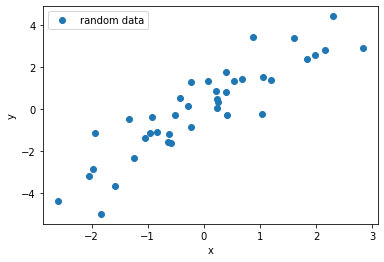

In [3]:
plt.plot(x, y, 'o', label='random data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

As you already know there are many excellent 3rd party libraries in python that you can import, so that you dont have to write all the code yourself. It turns out scipy has a function that allows us to do linear regression that a kind open source developer has already made for us.

In [4]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x, y)

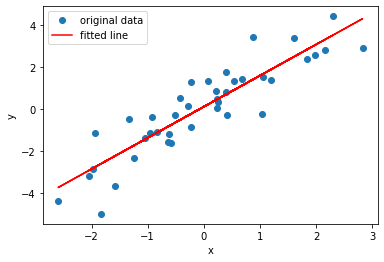

In [5]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

As well as the slope and intercept of the fitted model, which allow us to create the plot above, the function ```linregress()``` also returns other information when it is called.

**Task 1:** 
* Print the slope and intercept, do they match what you think it should be based on the plot and equation used to generate the data?
* What is the correlation coefficient of the linear regression?

In [6]:
#### your answer here
print(f"Slope : {slope} , Intercept : {intercept}")
print("On s'attend à un intercept proche de 0 (selon le plot et le fait que l'on n'a pas ajouté de cst dans l'équation et une slope proche de 1.6 par rapport au coefficient utilisé dans la génération de y")
print(f"Correlation coefficient : {r_value:.3f}")


Slope : 1.4831232347196697 , Intercept : 0.09602333966709839
On s'attend à un intercept proche de 0 (selon le plot et le fait que l'on n'a pas ajouté de cst dans l'équation et une slope proche de 1.6 par rapport au coefficient utilisé dans la génération de y
Correlation coefficient : 0.897


* conduct a linear regresison for the arrays x2, y2 below
* print slope, intercept, correlation coefficient

In [7]:
x2 = np.array([ 0.22827309,  1.0268903 , -0.83958485, -0.59118152, -0.9568883 ,
       -0.22232569, -0.61991511,  1.83790458, -2.05323076,  0.86858305,
       -0.92073444, -0.23231186,  2.1529569 , -1.33466147,  0.07637965,
       -1.24608928,  1.20227231, -1.04994158,  1.05661011, -0.41967767,
        2.29484234, -2.59448738,  2.8227564 ,  0.68088892, -1.57769345,
       -1.97625359,  0.53333982, -0.29086971, -0.51351967,  1.98262608,
        0.22600105, -1.83990496,  1.60767083,  0.38829194,  0.39973206,
        0.4054766 ,  0.21700177, -0.6334391 ,  0.24662153, -1.93954552])

In [8]:
y2 = np.array([-0.18269538, -3.2202988 ,  1.33454079,  0.0630553 ,  1.6085824 ,
       -0.21392876,  0.58013809, -2.95481368,  2.772595  ,  0.88925045,
        2.29120304,  1.96443982, -3.42629745,  3.35625955,  1.07883913,
        1.24503731, -2.10728298,  1.65268524, -1.57941313,  1.73556883,
       -2.25436816,  3.15079347, -5.2922891 , -0.57261505,  0.89058007,
        2.88268935, -0.22134391,  0.95599233,  1.17298232, -3.20390167,
       -0.64017069,  0.32593461, -1.32103579,  0.6240868 , -0.35272815,
       -1.49437497,  0.20989395,  0.27261366, -0.40530206,  4.48897751])

In [9]:
# your solution here
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)

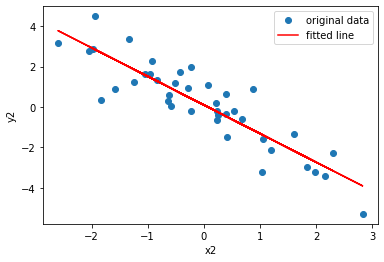

In [10]:
plt.plot(x2, y2, 'o', label='original data')
plt.plot(x2, intercept + slope*x2, 'r', label='fitted line')
plt.xlabel('x2')
plt.ylabel('y2')
plt.legend();

Au vu du plot, on s'attend à un intecept autour de 0 et à une slope négative autour de -2

In [11]:
print(f"Slope : {slope} , Intercept : {intercept}")
print(f"Correlation coefficient : {r_value:.3f}")

Slope : -1.4168767639318265 , Intercept : 0.09602333952431144
Correlation coefficient : -0.889


#### Statsmodels package 

Although the scipy package offers many statistical functions, there are more specialised statistical packages on offer such as **statsmodels**. This package allows you to complete linear regression as well as many other statistical methods and test. You can browse its offerings [here](https://www.statsmodels.org/stable/index.html). It uses a syntax and has output close to that of the **R** language and ecosystem, which is specialised statistical software/language.

We can use it to model the same random data we looked at above.

Pour comprendre comment fonctionne la méthode OLS : https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

In [12]:
import statsmodels.api as sm

x = sm.add_constant(x) # an intercept term to the model
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 04 May 2022   Prob (F-statistic):           4.78e-15
Time:                        13:42:45   Log-Likelihood:                -54.427
No. Observations:                  40   AIC:                             112.9
Df Residuals:                      38   BIC:                             116.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0960      0.153      0.627      0.5

**Task 2:**

To help understand the output, write down what the terms being reported mean:
* R-squared
* coef (regression coefficient)
* std err (standard error)
* P>|t| (p-value)
* [0.025 0.975] (confidence intervals)

Write down what *least squares* regression is.

NOTE: ISLR introductory chapters explain most of these. If not look them up online.

**Reponse:**  
least square regression use the sum of the square difference between the value and the curve (also called residuals) and tries to  decrease this value to find a min

### Exercise 2 - looking for associations in Emergency Departments

Emergency departments across the westernised world are suffering from increasing number of patient visits and find themselves more often overcrowded. Overcrowding has been linked to worse patient health outcomes and waiting times within hospital. The search to understand why this is occuring and what can be done to alleviate overcrowding is currently an [active area of research](https://emj.bmj.com/content/early/2019/11/25/emermed-2018-207917).

One theory is that if the main hospital is full then patients will be forced to stay in the Emergency Department as they cannot be moved into the main hospital. This may result in the Emergency Department becoming overcrowded. In the UK patients who are medically fit to return home but are still in hospital are reffered to as 'delayed transfers of care' (or DTOCS for short). The number of occurances of this is measured in hospitals. The number of long waiting times in Emergency Departments (longer than 4 hours) are also recorded.

Your job is to understand if there is a relationship between the numbers of DTOCS and the numbers of long-waits in Emergency Departments.

You must:
* load the data
* plot the data as a scatter plot
* run a linear regression using statsmodels
* add your regression line to the scatter plot
* describe what the p-values, confidence intervals and r-squared values indeicate. 

<details><summary>HINT</summary><br>
when adding the regression line the `params` attribute (of the `model` object) contains the fitted coeficients
</details>

In [13]:
def load_dtoc_dataset():
    '''
    Loads the long_wait and dtoc data sets into memory
    Returns a tuple of numpy.ndarrays representing
    breach and dtoc dataset respectively.
    '''
    #note we use skip_header because the dataset has column descriptors
    dtocs = np.genfromtxt('./data/dtocs.csv', skip_header=1)
    long_waits = np.genfromtxt('./data/long_waits.csv', skip_header=1)
    return long_waits, dtocs
    
    
long_waits, dtocs = load_dtoc_dataset()

In [14]:
def ajustR(R,nbpredictor):
    r2 = 1-(1-R)*(8000-1)/(8000-nbpredictor-1)
    return r2

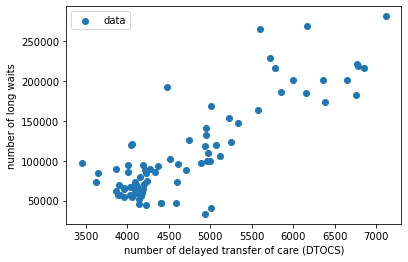

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 04 May 2022   Prob (F-statistic):           6.80e-23
Time:                        13:42:45   Log-Likelihood:                -945.02
No. Observations:                  80   AIC:                             1894.
Df Residuals:                      78   BIC:                             1899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.633e+05      2e+04     -8.178      0.0

In [15]:
#### your solution here
plt.scatter(dtocs,long_waits,label='data')
plt.xlabel("number of delayed transfer of care (DTOCS)")
plt.ylabel("number of long waits")
plt.legend()
plt.show()

dtocs = sm.add_constant(dtocs)
model_1 = sm.OLS(long_waits, dtocs)
results_1 = model_1.fit()
print(results_1.summary())

long_waits, dtocs = load_dtoc_dataset()
model_2 = sm.OLS(long_waits, dtocs)
results_2 = model_2.fit()
print(results_2.summary())

In [16]:
from sklearn.linear_model import LinearRegression

dtocs = dtocs.reshape((-1, 1))
model_reg_1 = LinearRegression().fit(dtocs,long_waits)
r_sq = model_reg_1.score(dtocs,long_waits)
r_sq_ad = ajustR(r_sq,2)
print('R²:', r_sq)
print(f'Adjusted R² : {r_sq_ad}')
print('intercept:', model_reg_1.intercept_)
print('slope:', model_reg_1.coef_)

print('\nSans intercept')
model_reg_2 = LinearRegression(fit_intercept=False).fit(dtocs,long_waits)
r_sq = model_reg_2.score(dtocs,long_waits)
r_sq_ad = ajustR(r_sq,1)
print('R²:', r_sq)
print(f'Adjusted R² : {r_sq_ad}')
print('intercept:', model_reg_2.intercept_)
print('slope:', model_reg_2.coef_)


R²: 0.713856212405731
Adjusted R² : 0.7137846496227889
intercept: -163295.91802691872
slope: [57.72817214]

Sans intercept
R²: 0.4685016940650877
Adjusted R² : 0.46843524016337046
intercept: 0.0
slope: [24.46966197]


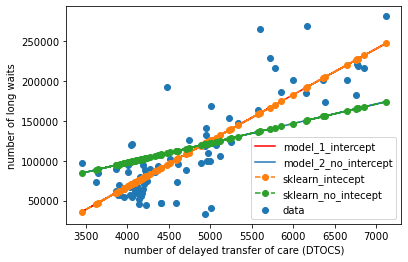

In [17]:
intercept, coeff_1 = results_1.params
plt.plot(dtocs, intercept + coeff_1*dtocs, c='r', label='model_1_intercept')
coeff_1 = results_2.params
plt.plot(dtocs, coeff_1*dtocs,label='model_2_no_intercept')
plt.plot(dtocs, model_reg_1.intercept_ + model_reg_1.coef_*dtocs,label='sklearn_intecept',linestyle='dashed',marker='o')
plt.plot(dtocs, model_reg_2.coef_*dtocs,label='sklearn_no_intecept',linestyle='dashed',marker='o')
plt.scatter(dtocs,long_waits,label='data')
plt.xlabel("number of delayed transfer of care (DTOCS)")
plt.ylabel("number of long waits")
plt.legend()
plt.show()

The model with intercept is better(better fit seen using plot and AIC/BIC) . Both package provide the correct results with or without intercept

Another data scientist informs you that there is a problem using linear regression when the data is a time series. A basic way of dealing with this issue is to take a first difference of the data. 

You must:
* Create a new numpy array which contains the first differenced values of the long_waits array
* Create a new numpy array which contains the first differenced values of the DTOCS array
* Plot the data as a scatter plot
* Perform linear regression using statsmodels on this differenced data
* add your regression line to the scatter plot
* describe what the p-values, confidence intervals and r-squared values indicate.

<details><summary>HINT</summary><br>
Numpy contains a function called ```np.diff()``` that might help
</details>

In [18]:
long_waits, dtocs = load_dtoc_dataset()

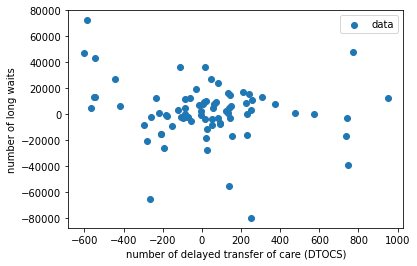

In [19]:
#### your solution here
d_long_waits = np.diff(long_waits)
d_dtocs = np.diff(dtocs)

plt.scatter(d_dtocs,d_long_waits,label='data')
plt.xlabel("number of delayed transfer of care (DTOCS)")
plt.ylabel("number of long waits")
plt.legend()
plt.show()


In [20]:
# linear regression sklearn

d_dtocs_r = d_dtocs.reshape((-1, 1))
model_reg_1 = LinearRegression().fit(d_dtocs_r,d_long_waits)
r_sq = model_reg_1.score(d_dtocs_r,d_long_waits)
r_sq_ad = ajustR(r_sq,2)
print('R²:', r_sq)
print(f'Adjusted R² : {r_sq_ad}')
print('intercept:', model_reg_1.intercept_)
print('slope:', model_reg_1.coef_)

R²: 0.03479042578532532
Adjusted R² : 0.03454903286942823
intercept: 2417.076066248109
slope: [-13.31440822]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.775
Date:                Wed, 04 May 2022   Prob (F-statistic):             0.0998
Time:                        13:42:45   Log-Likelihood:                -901.09
No. Observations:                  79   AIC:                             1806.
Df Residuals:                      77   BIC:                             1811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2417.0761   2484.505      0.973      0.3

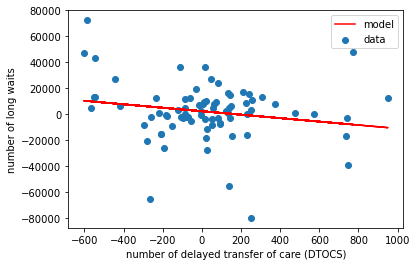

In [21]:
# linear regression stats model

d_dtocs_c = sm.add_constant(d_dtocs)
model_1 = sm.OLS(d_long_waits, d_dtocs_c)
results_1 = model_1.fit()
print(results_1.summary())

intercept, coeff_1 = results_1.params
plt.plot(d_dtocs, intercept + coeff_1*d_dtocs, c='r', label='model')
plt.scatter(d_dtocs,d_long_waits,label='data')
plt.xlabel("number of delayed transfer of care (DTOCS)")
plt.ylabel("number of long waits")
plt.legend()
plt.show()

*describe what the p-values, confidence intervals and r-squared values indicate.*  
for the p-values [0.334,0.100] they indicate if the coefficients are equal to zero => as they are above 0.05 then the coeff are not diff than zero and there is no effect of DTOCS on the nb of longs waits  
confidences interval where the "true" coefficient (population coefficient) lies with a 95% chance  
r-squares values represents the fit of the curve compared to the data calculated using 1-(ssr)/(ssm) with ssr: sum(yi - y_curvei)² and ssm being the sum(yi-ymean)² 

## Residual plots
For completenes we need to consider if the assumptions we made when implementing our linear regression are valid. According to **ISTL**
> When we fit a linear regression model to a particular data set, many problems may occur. Most common among these are the following:
> 1. Non-linearity of the response-predictor relationships.
> 2. Correlation of error terms.
> 3. Non-constant variance of error terms.
4. Outliers.
5. High-leverage points.
6. Collinearity.
>
> In practice, identifying and overcoming these problems is as much an
art as a science. Many pages in countless books have been written on this
topic. Since the linear regression model is not our primary focus here, we
will provide only a brief summary of some key points

If you need to know about this in future a good place to start is the overview of these problems **ISLR** section *3.3.3.*. 

Here we will now focus on how to produce some of the diagnostic plots in python which help us assess these issues. In my experience producing these plots in python sometimes takes a lot more thought/work than using R packages which are specialised for this kind of statistical work. 

Some other resources:

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

https://www.statsmodels.org/stable/diagnostic.html

https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

#### Normality


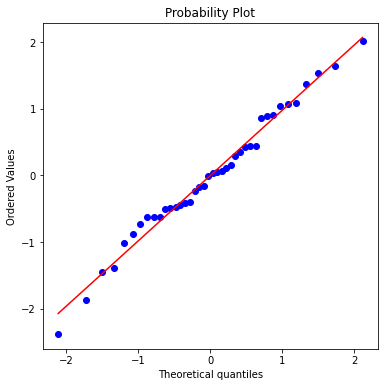

In [22]:
from scipy.stats import probplot
fig, ax = plt.subplots(figsize=(6,6))
probplot(results.resid, plot=ax, fit=True); # the .resid attribute contains a numpy array of the residuals

#### Linearity & Non-constant variance

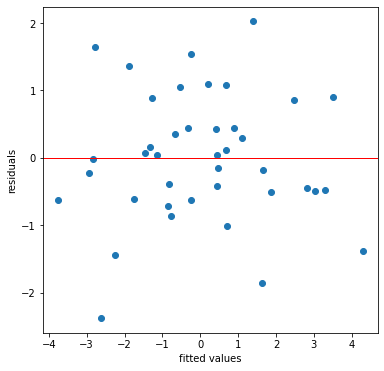

In [23]:
fig, ax = plt.subplots(figsize=(6,6));
plt.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('fitted values');
ax.set_ylabel('residuals');
ax.axhline(linewidth=1, color='r');

#### Leverage

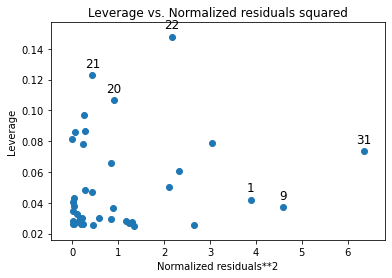

In [24]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(results);

**Task 3**: 
* Reproduce the plots above but for the model that used differenced data that you produced earlier
* What would you conclude from each of these plots? Does your fitted model satisfy all of the assumptions to mean it is trustworthy? 

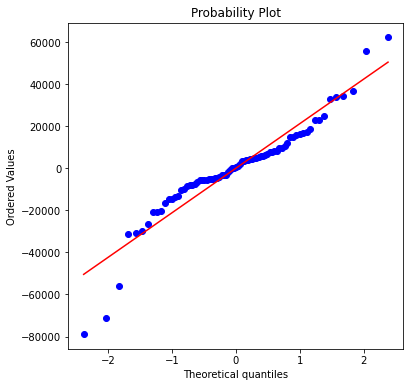

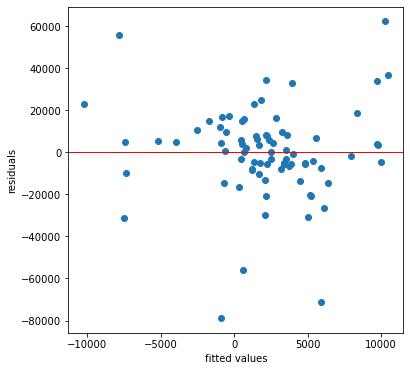

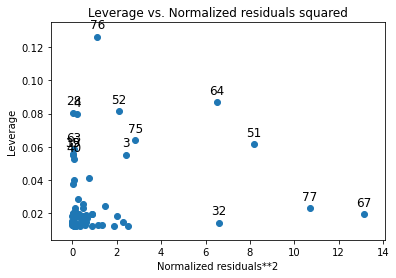

In [25]:
#### your code here
fig, ax = plt.subplots(figsize=(6,6))
probplot(results_1.resid, plot=ax, fit=True); # the .resid attribute contains a numpy array of the residuals

fig, ax = plt.subplots(figsize=(6,6));
plt.scatter(results_1.fittedvalues, results_1.resid)
ax.set_xlabel('fitted values');
ax.set_ylabel('residuals');
ax.axhline(linewidth=1, color='r');

plot_leverage_resid2(results_1);

## Variable selection

Usually we may have multiple measurements and we are unsure which are able to best explain the variable we are trying to predict. Then we use *multiple* linear regression to determine which variables are important.

For example we can consdier the effect of advertising budgets for various media on overall sales of a product. See **ISLR** chapter 3. Here TV, Radio and Newspaper are individual advertising budgets and sales is the total numbers of a produce sold.

In [26]:
#### import advertising data
advertising = pd.read_csv('./data/Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We can use statsmodels to fit a *multiple* linear regression model using the same code as before. It will take a 1-d array as the $Y$ variable, and a 2-d numpy matrix for the $X$ vars (where each column represents the data associated with $X1, X2, ...X_{p}$). 

**Note: we are now passing a pandas series (for $Y$, 1d), and a pandas dataframe(for $X$, 2d). This is much more convenient as statsmodels knows to use the series/dataframe titles as labels for our summary output.**

In [27]:
def perform_linear_regression(Y,X):
    """
    Function performs linear regression, prints adjusted r-squared and coef table, and returns the model results object.
    
    Input
    =====
    Y, padnas series,
    X, padnas dataframe,
    
    Return
    ======
    results, statsmodel linear regression results object
    
    """
    # fit multiple linear regression model
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    print('Adjusted R-squared: {0:1.3f}'.format(results.rsquared_adj))
    print(results.summary().tables[1])
    return(results)


sales = advertising['Sales']
media_budgets = advertising[['TV','Radio','Newspaper']]

results = perform_linear_regression(sales, media_budgets)

Adjusted R-squared: 0.896
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In selecting a good model that only uses important media budget variables to explain the relationship of sales we would probably remove the Newspaper variable from our model (see chapter 3 for a detailed explantion of this). As you can see below the adjusted r-squared value is similar, and so we have not lost any information in our model. This was a good decision.

In [28]:
sales = advertising['Sales']
media_budgets = advertising[['TV','Radio']]

results = perform_linear_regression(sales, media_budgets)

Adjusted R-squared: 0.896
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


### Automating variable selection

Sometimes we have too many variables to manually check every possible combination of variables. The number of possible models quickly gets out of hand because there are $2^p$ models that contain subsets of $p$ variables. This means that even for moderate $p$, trying out every possible subset of the variables is infeasible. For instance, we saw that if $p = 2$, then
there are $2^2 = 4$ models to consider. But if $p = 30$, then we must consider $2^{30} = 1,073,741,824$ models!

One classical method for variable selection is *backward selection*. Here we start with all variables in the model, and backward remove the variable with the largest p-value — that is, the variable selection that is the least statistically significant. The new $(p − 1)$-variable model is fit, and the variable with the largest p-value is removed. This
procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold. (see **ISLR** section 3.2 'Two: deciding on important varaibles' for more info)

### Exercise 3: Finding alcohol content of wine using other characteristics

You will find a data set containing attributes of different types of wine in `wine.csv` in the data folder. Your task is to find which other variables are important in explaining the alcohol content.

You must:
* perform a linear regression using all the varaibles
* write a piece of code to implement backwards selection.

Your solution, at each stage of the selection, must:
* print the name of the variable removed
* print the adjusted r-squared
* return the coefficient and p-value results of each variable

You must use your code output to answer:
* How many variables have been removed to end with only significant varaibles?
* Which varaibles remain in your model?

<details><summary>HINT</summary><br>
(assume the stopping rule is that you stop when there are only significant varaibles contained in your model)
</details>

In [29]:
#### your solution here
df_wine = pd.read_csv('./data/wine.csv')

In [30]:
df_wine

,Grape,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.51,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.84,1.01
1,1,0.25,-0.50,-0.83,-2.48,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.40,1.11,0.96
2,1,0.20,0.02,1.11,-0.27,0.09,0.81,1.21,-0.50,2.13,0.27,0.32,0.79,1.39
3,1,1.69,-0.35,0.49,-0.81,0.93,2.48,1.46,-0.98,1.03,1.18,-0.43,1.18,2.33
4,1,0.29,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.87,2.97,0.30,0.30,-0.33,-0.98,-1.42,1.27,-0.93,1.14,-1.39,-1.23,-0.02
174,3,0.49,1.41,0.41,1.05,0.16,-0.79,-1.28,0.55,-0.32,0.97,-1.13,-1.48,0.01
175,3,0.33,1.74,-0.39,0.15,1.42,-1.13,-1.34,0.55,-0.42,2.22,-1.61,-1.48,0.28
176,3,0.21,0.23,0.01,0.15,1.42,-1.03,-1.35,1.35,-0.23,1.83,-1.56,-1.40,0.30


In [90]:
def checkPvalues(s):
    non_sig=False
    to_drop=None
    max_pval = s[1:len(s)].max()
    if max_pval>0.05:
        to_drop = s[1:len(s)].idxmax()
        non_sig=True
    return non_sig,to_drop

def perfLR(Y,X):
    """
    Function performs linear regression, prints adjusted r-squared and coef table, and returns the model results object.
    
    Input
    =====
    Y, padnas series,
    X, padnas dataframe,
    
    Return
    ======
    results, statsmodel linear regression results object
    
    """
    # fit multiple linear regression model
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    print(f'Adjusted R-squared: {results.rsquared_adj:1.3f}')
    print(f'BIC: {results.bic}')
    print(f'AIC: {results.aic}')
    print(results.summary().tables[1])
    non_sig,to_drop = checkPvalues(results.pvalues)
    values =[to_drop,results.rsquared_adj,results.bic,results.aic]

    return non_sig,to_drop,values
    
def backwardSelect(df,ycol):
    val=[]
    Y = df[ycol]
    X = df.drop(ycol,axis=1)
    non_sig,to_drop,values= perfLR(Y,X)
    while non_sig:
        val.append(values)
        print(f'dropped {to_drop}\n')
        X = X.drop(to_drop,axis=1)
        non_sig,to_drop,values = perfLR(Y,X)
    val.append(values)
    return val

In [91]:
vals= backwardSelect(df_wine,'Alcohol')

Adjusted R-squared: 0.587
BIC: 405.54793861398434
AIC: 361.0029689098951
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.1726      0.374      3.136      0.002       0.434       1.911
Grape                           -0.6052      0.191     -3.164      0.002      -0.983      -0.227
Malic acid                       0.1906      0.061      3.140      0.002       0.071       0.310
Ash                              0.0187      0.072      0.260      0.795      -0.123       0.160
Alcalinity of ash               -0.0649      0.077     -0.847      0.398      -0.216       0.086
Magnesium                       -0.0045      0.058     -0.079      0.937      -0.118       0.109
Total phenols                    0.0934      0.102      0.917      0.360      -0.108       0.294
Flavanoids                      -0.2152      0.147    

In [92]:
r_l=[]
bic_l=[]
aic_l=[]
for (cols,r,bic,aic) in vals:
    r_l.append(r)
    bic_l.append(bic)
    aic_l.append(aic)


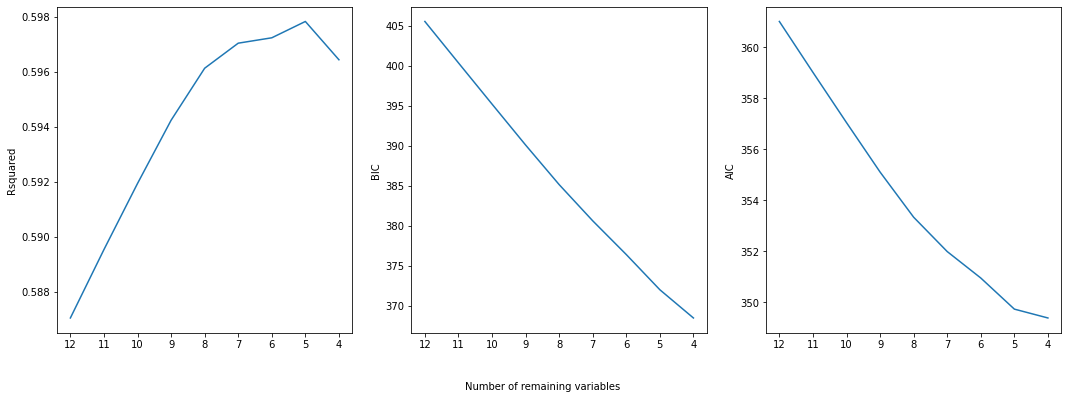

In [96]:
a=(r_l,bic_l,aic_l)
lab=('Rsquared','BIC','AIC')
fig, axes = plt.subplots(figsize=(18,6),ncols=3)
x = [i for i in range(12,3,-1)]
for ax,data,label in zip(axes,a,lab):
    ax.plot(x,data)
    ax.invert_xaxis()
    ax.set_ylabel(label)

fig.text(.5, 0, 'Number of remaining variables', ha='center', va='center')
plt.show()